In [2]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
from sklearn.metrics import r2_score
from sklearn import metrics

In [3]:
'''PIL_NW = pd.read_excel('Well_Data_daily.xlsx', sheet_name='PIL-NW', skiprows=[0,1,2,3], header=0, 
                     usecols="A,AE", index_col=0)
PIL_N = pd.read_excel('Well_Data_daily.xlsx', sheet_name='PIL-N', skiprows=[0,1,2,3], header=0,
                     usecols="A,AE", index_col=0)
P_F_5 = pd.read_excel('Well_Data_daily.xlsx', sheet_name='P-F-5', skiprows=[0,1,2,3], header=0,
                     usecols="A,AE", index_col=0)
P_F_1C = pd.read_excel('Well_Data_daily.xlsx', sheet_name='P-F-1C', skiprows=[0,1,2,3], header=0,
                     usecols="A,AE", index_col=0)
P_F_15D = pd.read_excel('Well_Data_daily.xlsx', sheet_name='P-F-15D', skiprows=[0,1,2,3], header=0,
                     usecols="A,AE", index_col=0)
P_F_15C = pd.read_excel('Well_Data_daily.xlsx', sheet_name='P-F-15C', skiprows=[0,1,2,3], header=0,
                     usecols="A,AE", index_col=0)'''
P_F_14 = pd.read_excel('Well_Data_daily.xlsx', sheet_name='P-F-14', skiprows=[0,1,2,3], header=0,
                     usecols="A,AE", index_col=0)
P_F_12 = pd.read_excel('Well_Data_daily.xlsx', sheet_name='P-F-12', skiprows=[0,1,2,3], header=0,
                     usecols="A,AE", index_col=0)
'''P_F_11B = pd.read_excel('Well_Data_daily.xlsx', sheet_name='P-F-11B', skiprows=[0,1,2,3], header=0,
                     usecols="A,AE", index_col=0)
I_F4G = pd.read_excel('Well_Data_daily.xlsx', sheet_name='I-F4G', skiprows=[0,1,2,3], header=0,
                     usecols="A,AE", index_col=0)
I_F_5_IJ = pd.read_excel('Well_Data_daily.xlsx', sheet_name='I-F-5_ij', skiprows=[0,1,2,3], header=0,
                     usecols="A,AE", index_col=0)
I_F_5 = pd.read_excel('Well_Data_daily.xlsx', sheet_name='I-F-5', skiprows=[0,1,2,3], header=0,
                     usecols="A,AE", index_col=0)
I_F_4_IJ = pd.read_excel('Well_Data_daily.xlsx', sheet_name='I-F-4_ij', skiprows=[0,1,2,3], header=0,
                     usecols="A,AE", index_col=0)
I_F_4 = pd.read_excel('Well_Data_daily.xlsx', sheet_name='I-F-4', skiprows=[0,1,2,3], header=0,
                     usecols="A,AE", index_col=0)
I_F_1B_IJ = pd.read_excel('Well_Data_daily.xlsx', sheet_name='I-F-1B_ij', skiprows=[0,1,2,3], header=0,
                     usecols="A,AE", index_col=0)
I_F_1B = pd.read_excel('Well_Data_daily.xlsx', sheet_name='I-F-1B', skiprows=[0,1,2,3], header=0,
                     usecols="A,AE", index_col=0)'''

'P_F_11B = pd.read_excel(\'Well_Data_daily.xlsx\', sheet_name=\'P-F-11B\', skiprows=[0,1,2,3], header=0,\n                     usecols="A,AE", index_col=0)\nI_F4G = pd.read_excel(\'Well_Data_daily.xlsx\', sheet_name=\'I-F4G\', skiprows=[0,1,2,3], header=0,\n                     usecols="A,AE", index_col=0)\nI_F_5_IJ = pd.read_excel(\'Well_Data_daily.xlsx\', sheet_name=\'I-F-5_ij\', skiprows=[0,1,2,3], header=0,\n                     usecols="A,AE", index_col=0)\nI_F_5 = pd.read_excel(\'Well_Data_daily.xlsx\', sheet_name=\'I-F-5\', skiprows=[0,1,2,3], header=0,\n                     usecols="A,AE", index_col=0)\nI_F_4_IJ = pd.read_excel(\'Well_Data_daily.xlsx\', sheet_name=\'I-F-4_ij\', skiprows=[0,1,2,3], header=0,\n                     usecols="A,AE", index_col=0)\nI_F_4 = pd.read_excel(\'Well_Data_daily.xlsx\', sheet_name=\'I-F-4\', skiprows=[0,1,2,3], header=0,\n                     usecols="A,AE", index_col=0)\nI_F_1B_IJ = pd.read_excel(\'Well_Data_daily.xlsx\', sheet_name=\'I-F-1B

In [4]:
#Inititial Visualization
#

# Number of production days that are not zero
#PIL-NW -> 0
#PIL-N -> 0
#P-F-5 -> 140
#P-F-1C -> 560
#P-F-15D -> 846
#P-F-15C -> 70
#P-F-14 -> 2870
#P-F-12 -> 3003
#P-F-11B -> 1155
#I-F4G -> 0
#I-F-5_ij -> 8
#I-F-5 -> 0
#I-F-4_ij -> 14
#I-F-4 -> 0
#I-F-1B_ij -> 21
#I-F-1B -> 0
P_F_14
P_F_12
P_F_14.head()

wells = pd.DataFrame([
    ['PIL-NW',3197],
    ['PIL-N',3197],
    ['P-F-5',3197],
    ['P-F-1C',3197],
    ['P-F-15D',3197],
    ['P-F-15C',3197],
    ['P-F-14',3197],
    ['P-F-12',3197],
    ['P-F-11B',3197],
    ['I-F4G',3197],
    ['I-F-5_ij',3197],
    ['I-F-5',3197],
    ['I-F-4_ij',3197],
    ['I-F-4',3197],
    ['I-F-1B_ij',3197],
    ['I-F-1B',3197]],
    columns=['Wells', 'Days of Production'])

wells_prod = pd.DataFrame([
    ['PIL-NW',0],
    ['PIL-N',0],
    ['P-F-5',140],
    ['P-F-1C',560],
    ['P-F-15D',846],
    ['P-F-15C',70],
    ['P-F-14',2870],
    ['P-F-12',3003],
    ['P-F-11B',1155],
    ['I-F4G',0],
    ['I-F-5_ij',8],
    ['I-F-5',0],
    ['I-F-4_ij',14],
    ['I-F-4',0],
    ['I-F-1B_ij',21],
    ['I-F-1B',0]],
    columns=['Wells', 'Non-Zero Production Days'])
wells_prod

,Wells,Non-Zero Production Days
0,PIL-NW,0
1,PIL-N,0
2,P-F-5,140
3,P-F-1C,560
4,P-F-15D,846
5,P-F-15C,70
6,P-F-14,2870
7,P-F-12,3003
8,P-F-11B,1155
9,I-F4G,0


In [5]:
P_F_14.head()
P_F_14.dtypes
#print(df1.isnull().sum())
df_no_duplicates = P_F_14.drop_duplicates()
df_no_duplicates.shape, P_F_14.shape

((2303, 1), (3197, 1))

In [6]:
P_F_14_v2 =P_F_14.rename(columns={'Oil Rate SC - Daily (m³/day)': 'Daily_Oil_Rate'})#, 'Cumulative Oil SC (m³)': 'Cum_Oil'})
P_F_12_v2 =P_F_12.rename(columns={'Oil Rate SC - Daily (m³/day)': 'Daily_Oil_Rate'})
P_F_14_v3 = P_F_14_v2[P_F_14_v2.Daily_Oil_Rate != 0]
P_F_12_v3 = P_F_12_v2[P_F_12_v2.Daily_Oil_Rate != 0] #df3a
P_F_12_v3.size

3003

## Graphs

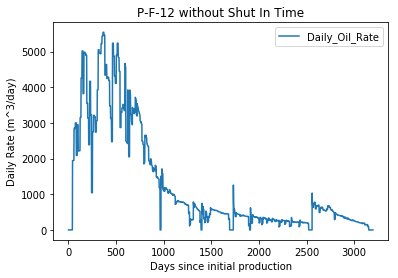

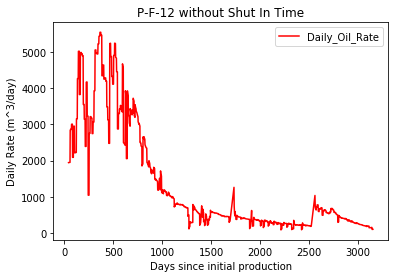

(3197, 1)

In [7]:
wellname='P-F-12'
P_F_12_v2.plot()
plt.xlabel('Days since initial production')
plt.ylabel('Daily Rate (m^3/day)')
plt.title('{wellname} without Shut In Time'.format(wellname=wellname))
plt.show()
P_F_12_v3.plot(color='r')
plt.xlabel('Days since initial production')
plt.ylabel('Daily Rate (m^3/day)')
plt.title('{wellname} without Shut In Time'.format(wellname=wellname))
plt.show()
P_F_12_v2.shape

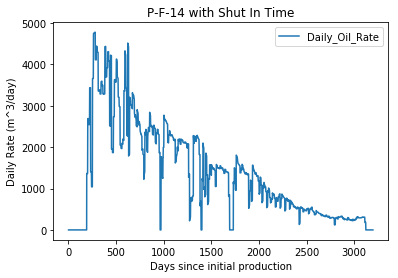

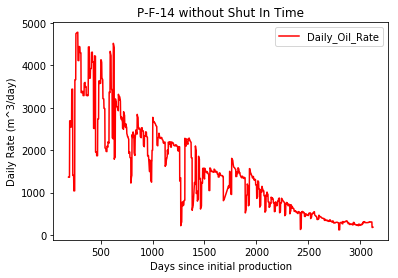

In [8]:
wellname='P-F-14'
P_F_14_v2.plot()
plt.xlabel('Days since initial production')
plt.ylabel('Daily Rate (m^3/day)')
plt.title('{wellname} with Shut In Time'.format(wellname=wellname))
plt.show()
P_F_14_v3.plot(color='r')
plt.xlabel('Days since initial production')
plt.ylabel('Daily Rate (m^3/day)')
plt.title('{wellname} without Shut In Time'.format(wellname=wellname))
plt.show()

## Statisitical learning

Mean Absolute Error:      5.962
Mean Squared Error:       738.920
Root Mean Squared Error:  27.183
R Squared Score is:       0.965


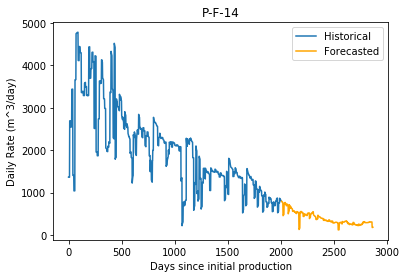

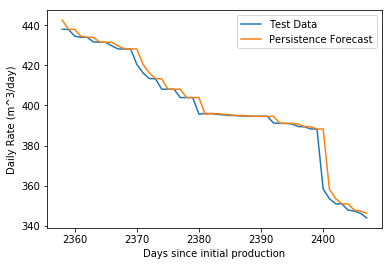

In [9]:
##Statisitical Learning
series=P_F_14_v3
X = series.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]

# rolling forecast
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])
    
# report performance
print('Mean Absolute Error:      %.3f' % metrics.mean_absolute_error(test, predictions))
print('Mean Squared Error:       %.3f' % metrics.mean_squared_error(test, predictions))
print('Root Mean Squared Error:  %.3f' % np.sqrt(metrics.mean_squared_error(test, predictions)))
print('R Squared Score is:       %.3f' % r2_score(test, predictions))
# line plot of observed vs predicted
trainf=numpy.concatenate([train,predictions], axis=0 )
plt.plot(trainf[:size], label ='Historical')
plt.plot(range(size, (size+len(trainf[size:]))),trainf[size:], color='orange', label ='Forecasted')
plt.xlabel('Days since initial production')
plt.ylabel('Daily Rate (m^3/day)')
plt.legend(loc=1)
plt.title('{wellname}'.format(wellname=wellname))
plt.show()
pyplot.plot(range((size+350),(size+400)),test[350:400], label='Test Data')
pyplot.plot(range((size+350),(size+400)),predictions[350:400], label='Persistence Forecast')
plt.xlabel('Days since initial production')
plt.ylabel('Daily Rate (m^3/day)')
plt.legend(loc=1)
pyplot.show()

## LSTM

In [105]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]


In [106]:
# transform data to be stationary
series=P_F_14_v3
raw_values = series.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
size = int(len(series.values) * 0.8)
train, test = supervised_values[0:size], supervised_values[size:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

C:\Users\Keenan\Anaconda\envs\python3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 300, 4)

Mean Absolute Error:      3.665
Mean Squared Error:       162.392
Root Mean Squared Error:  12.743
R Squared Score is:       0.967


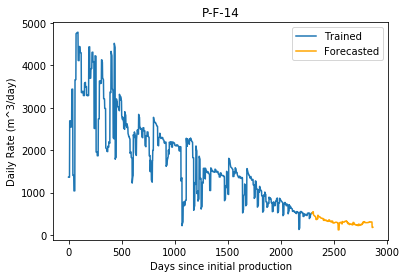

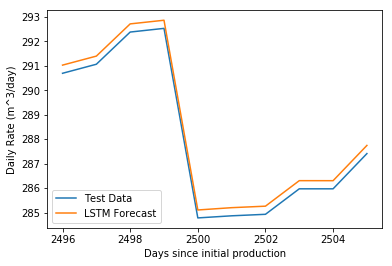

In [107]:
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
    
predictionsi = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictionsi.append(yhat)
	expected = raw_values[len(train) + i + 1]
	#print('Day=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

#report performance
# line plot of observed vs predicted
'''testf=numpy.concatenate([raw_values,predictions], axis=0 )
plt.plot(testf[:size])
plt.plot(range(size, (size+len(testf[size:]))),testf[size:], color='orange')
plt.show()'''

print('Mean Absolute Error:      %.3f' % metrics.mean_absolute_error(raw_values[size+1:], predictionsi))
print('Mean Squared Error:       %.3f' % metrics.mean_squared_error(raw_values[size+1:], predictionsi))
print('Root Mean Squared Error:  %.3f' % np.sqrt(metrics.mean_squared_error(raw_values[size+1:], predictionsi)))
print('R Squared Score is:       %.3f' % r2_score(raw_values[size+1:], predictionsi))
# line plot of observed vs predicted
testf=numpy.concatenate([raw_values,predictionsi], axis=0 )
plt.plot(testf[:size], label='Trained')
plt.plot(range(size, (size+len(trainf[size:]))),trainf[size:], color='orange', label ='Forecasted')
plt.xlabel('Days since initial production')
plt.ylabel('Daily Rate (m^3/day)')
plt.legend(loc=1)
plt.title('{wellname}'.format(wellname=wellname))
plt.show()
pyplot.plot(range((size+200),(size+210)),testf[(size+200):(size+210)], label='Test Data')
pyplot.plot(range((size+200),(size+210)),predictionsi[200:210], label='LSTM Forecast')
plt.xlabel('Days since initial production')
plt.ylabel('Daily Rate (m^3/day)')
plt.legend(loc=3)
pyplot.show()

## Validate 

In [108]:
# scale complete dataset from [-1, 1]
def scaleV(valid):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(valid)
	# transform validation
	valid = valid.reshape(valid.shape[0], valid.shape[1])
	valid_scaled = scaler.transform(valid)
	return scaler, valid_scaled

In [114]:
#validate the model
valid=P_F_12_v3
# transform data to be stationary
raw_values = valid.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
## split data into train and test-sets
sizeV = int(len(valid.values))
#train, test = supervised_values[0:size], supervised_values[size:]
 
# transform the scale of the data
scaler, valid_scaled = scaleV(supervised_values)

C:\Users\Keenan\Anaconda\envs\python3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [115]:
# forecast the entire  dataset to build up state for forecasting
#valid_reshaped = valid_scaled[:, 0].reshape(len(valid_scaled), 1, 1)
#lstm_model.predict(valid_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
predictions.append(raw_values[-1])

pred_scaled = valid_scaled[-2]
#pred_scaled = list()

pred_scaled=np.vstack((pred_scaled,valid_scaled[-1]))

pred_scaled
#pred_scaled[0, 0:-1]

array([[-0.11567784, -0.11579819],
       [-0.11579819, -0.11580101]])

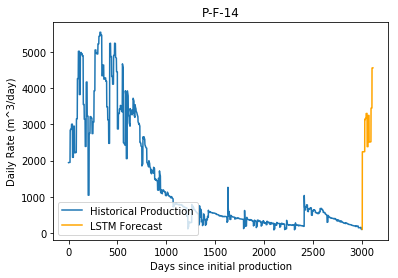

In [118]:
for i in range(1, 100):
	# make one-step forecast
	X, y = pred_scaled[i, 0:-1], pred_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	temp=np.array([yhat,y])
	pred_scaled=np.vstack((pred_scaled,temp))
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(valid_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	#expected = raw_values[len(train) + i + 1]
	#print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

# line plot of observed vs predicted
#size = len(predictions)

testf=numpy.concatenate([raw_values,predictions], axis=0 ) #raw values = historical production
plt.plot(testf[:sizeV], label='Historical Production')
plt.plot(range(sizeV, (sizeV+len(predictions))), testf[sizeV:], color='orange', label='LSTM Forecast')
plt.xlabel('Days since initial production')
plt.ylabel('Daily Rate (m^3/day)')
wellname='P-F-14'
plt.title('{wellname}'.format(wellname=wellname))
plt.legend(loc=3)
plt.show()

## Copy Pasta

C:\Users\Keenan\Anaconda\envs\python3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Test RMSE: 12.424


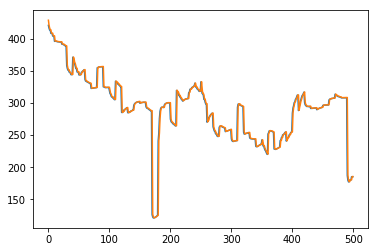

In [119]:
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
 
# date-time parsing function for loading the dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
# load dataset
series=P_F_14_v3
 
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-500], supervised_values[-500:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
#lstm_model = fit_lstm(train_scaled, 1, 200, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	#print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-500:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-500:])
pyplot.plot(predictions)
pyplot.show()

In [120]:
#validate the model
valid=P_F_12_v3
# transform data to be stationary
raw_values = valid.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
## split data into train and test-sets
sizeV = int(len(valid.values))
#train, test = supervised_values[0:size], supervised_values[size:]
 
# transform the scale of the data
scaler, valid_scaled = scaleV(supervised_values)

C:\Users\Keenan\Anaconda\envs\python3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


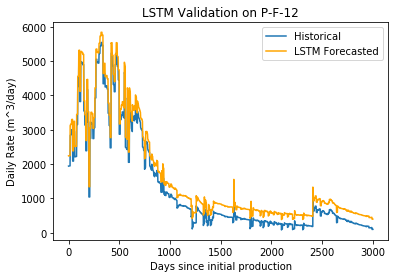

Mean Absolute Error:      298.685
Mean Squared Error:       89213.636
Root Mean Squared Error:  298.687
R Squared Score is:       0.959


In [121]:
# forecast the entire  dataset to build up state for forecasting
valid_reshaped = valid_scaled[:, 0].reshape(len(valid_scaled), 1, 1)
lstm_model.predict(valid_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(valid_scaled)):
	# make one-step forecast
	X, y = valid_scaled[i, 0:-1], valid_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(valid_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	#expected = raw_values[len(train) + i + 1]
	#print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

#report performance
#rmse = sqrt(mean_squared_error(raw_values[sizeV+1:], predictions))
#print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
#size = len(predictions)

testf=numpy.concatenate([raw_values,predictions], axis=0 )
plt.plot(testf[:sizeV], label='Historical')
plt.plot(testf[sizeV:], color='orange', label='LSTM Forecasted')
plt.title('LSTM Validation on P-F-12')
plt.xlabel('Days since initial production')
plt.ylabel('Daily Rate (m^3/day)')
plt.legend(loc=1)
plt.show()

print('Mean Absolute Error:      %.3f' % metrics.mean_absolute_error(raw_values[:3002], predictions))
print('Mean Squared Error:       %.3f' % metrics.mean_squared_error(raw_values[:3002], predictions))
print('Root Mean Squared Error:  %.3f' % np.sqrt(metrics.mean_squared_error(raw_values[:3002], predictions)))
print('R Squared Score is:       %.3f' % r2_score(raw_values[:3002], predictions))
